# Plotting a map for paper

- Historical average surface density
- probelm with color map

In [11]:
import os
import numpy as np
import xarray as xr
import pop_tools
import matplotlib.pyplot as plt
import cmocean.cm as cmo
import cartopy.crs as ccrs
import cartopy.feature
import matplotlib as mpl

nature_coast = cartopy.feature.NaturalEarthFeature('physical', 'land', '50m', linewidth=0.5, edgecolor='black', facecolor='whitesmoke')

In [2]:
grid_name = 'POP_gx1v7'
region_defs = {
    'SubpolarAtlantic': [
        {'match': {'REGION_MASK': [6]}, 'bounds': {'TLAT': [15.0, 80.0], 'TLONG': [260.0, 360.0]}},
#        {'match': {'REGION_MASK': [6]}, 'bounds': {'TLAT': [15.0, 80.0], 'TLONG': [0.0, 10.0]}}
    ],
    'LabradorSea': [
        {'match': {'REGION_MASK': [8]}}
    ],
    'GINSeas': [
        {'match': {'REGION_MASK': [9]}, 'bounds': {'TLAT': [15.0, 80.0], 'TLONG': [260.0, 360.0]}},
#        {'match': {'REGION_MASK': [9]}, 'bounds': {'TLAT': [15.0, 80.0], 'TLONG': [0.0, 10.0]}}
    ]
}
mask = pop_tools.region_mask_3d(grid_name, region_defs=region_defs)
mask = mask.sum('region')

sigma_annual = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/composites/sigma_composite_annual.nc'
ds_sigma = xr.open_dataset(sigma_annual)

replacement_value = 0
ds_sigma['TLAT'] = xr.where(
    np.logical_or(np.isnan(ds_sigma['TLAT']), np.logical_or(np.isinf(ds_sigma['TLAT']), np.ma.getmask(ds_sigma['TLAT']))),
    replacement_value,
    ds_sigma['TLAT'])
ds_sigma['TLONG'] = xr.where(
    np.logical_or(np.isnan(ds_sigma['TLONG']), np.logical_or(np.isinf(ds_sigma['TLONG']), np.ma.getmask(ds_sigma['TLONG']))),
    replacement_value,
    ds_sigma['TLONG'])

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [6]:
ds_sigma.z_t

<xarray.DataArray 'z_t' (z_t: 60)>
array([5.000000e+02, 1.500000e+03, 2.500000e+03, 3.500000e+03, 4.500000e+03,
       5.500000e+03, 6.500000e+03, 7.500000e+03, 8.500000e+03, 9.500000e+03,
       1.050000e+04, 1.150000e+04, 1.250000e+04, 1.350000e+04, 1.450000e+04,
       1.550000e+04, 1.650984e+04, 1.754790e+04, 1.862913e+04, 1.976603e+04,
       2.097114e+04, 2.225783e+04, 2.364088e+04, 2.513702e+04, 2.676542e+04,
       2.854837e+04, 3.051192e+04, 3.268680e+04, 3.510935e+04, 3.782276e+04,
       4.087846e+04, 4.433777e+04, 4.827367e+04, 5.277280e+04, 5.793729e+04,
       6.388626e+04, 7.075633e+04, 7.870025e+04, 8.788252e+04, 9.847059e+04,
       1.106204e+05, 1.244567e+05, 1.400497e+05, 1.573946e+05, 1.764003e+05,
       1.968944e+05, 2.186457e+05, 2.413972e+05, 2.649001e+05, 2.889385e+05,
       3.133405e+05, 3.379793e+05, 3.627670e+05, 3.876452e+05, 4.125768e+05,
       4.375392e+05, 4.625190e+05, 4.875083e+05, 5.125028e+05, 5.375000e+05],
      dtype=float32)
Coordinates:
  * z_t      (z_t) float32 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05
Attributes:
    long_name:  depth from surface to midpoint of layer
    units:      centimeters
    positive:   down
    valid_min:  500.0
    valid_max:  537500.0

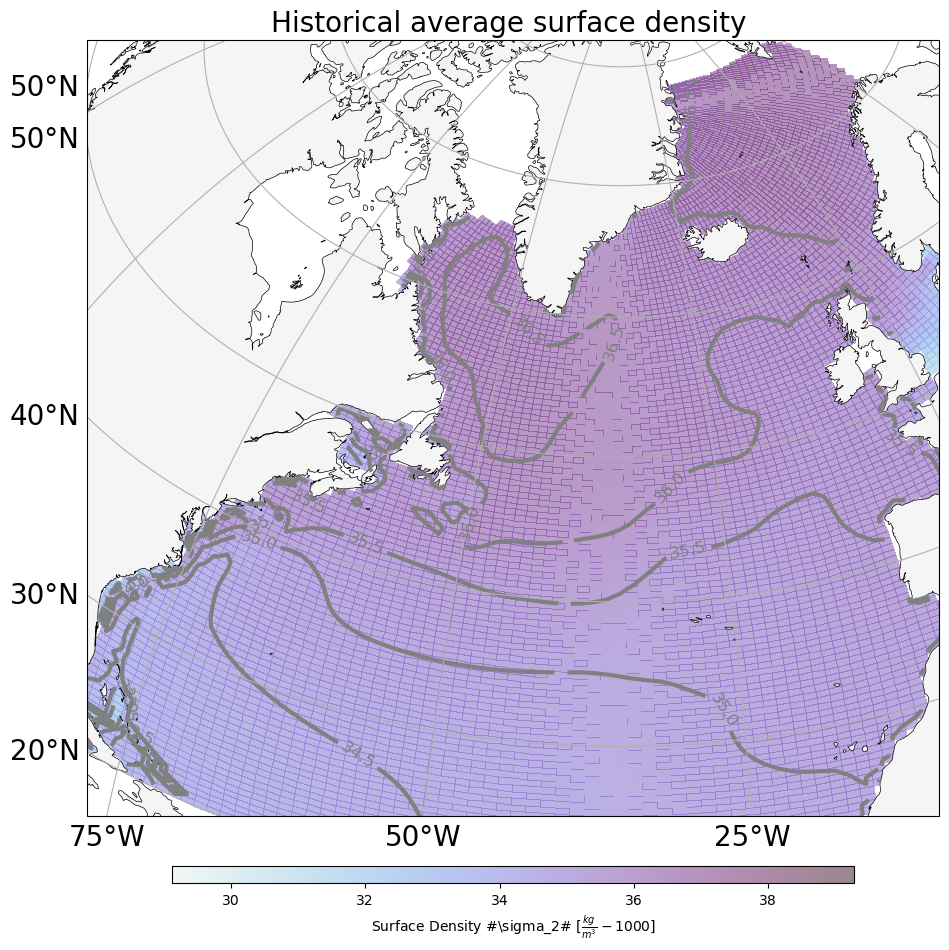

In [12]:
#plotting_data = ds_sigma.SIGMA_2.sel(z_t=slice(5.000000e+02, 1.050000e+04)).mean(dim=['z_t','time']).roll(nlon=+100)
plotting_data = ds_sigma.SIGMA_2.sel(z_t=slice(5.0000000e+02, 9.8470586e+04)).mean(dim=['z_t','time']).roll(nlon=+100)
#plotting_data = ds_sigma.SIGMA_2.sel(z_t=slice(5.0000000e+02, 3.627670e+05)).mean(dim=['z_t','time']).roll(nlon=+100)
#plotting_data = ds_sigma.SIGMA_2.sel(z_t=5.0000000e+02).mean(dim=['time']).roll(nlon=+100)
cbar_kwargs = {'orientation': 'horizontal', 'shrink': 0.8, 'aspect': 40,
               'label': r'Surface Density #\sigma_2# [$\frac{kg}{m^3} -1000$]', 'pad': 0.05}
labelsize = 20


cmap = 


plt.figure(figsize=(11, 13))
ax = plt.axes(projection=ccrs.Orthographic(central_latitude=40, central_longitude=-35))
ax.set_extent([-80, -10, 25, 80], crs=ccrs.PlateCarree())

pc = plotting_data.plot.pcolormesh(ax=ax,
                                   transform=ccrs.PlateCarree(),
                                   x='TLONG',
                                   y='TLAT',
                                   cbar_kwargs=cbar_kwargs,
                                   cmap=cmo.dense)

#pc.colorbar.ax.xaxis.label.set_size(labelsize)
#pc.colorbar.ax.tick_params(axis='x', labelsize=labelsize, size=8)
ax.tick_params(axis='both', which='both', labelsize=labelsize, size=6)

gl = ax.gridlines(draw_labels=True)
gl.right_labels = False
gl.top_labels = False
gl.xlabel_style = {'size': labelsize}
gl.ylabel_style = {'size': labelsize}

ax.add_feature(nature_coast)
plt.title('Historical average surface density ', fontsize=labelsize)

contour_levels = np.arange(np.floor(plotting_data.min().item()), 
                           np.ceil(plotting_data.max().item()) + 0.5, 0.5)
cs = ax.contour(ds_sigma.TLONG, ds_sigma.TLAT, 
                plotting_data.where(mask > 0), 
                levels=contour_levels, 
                linewidths=3, 
                colors='gray', 
                transform=ccrs.PlateCarree())
ax.clabel(cs, fmt='%1.1f', inline=True, fontsize=12)

plt.show()
#plt.savefig(os.path.expanduser('~/phase1_CONDA/results/')+'Density_map.png', bbox_inches='tight', dpi=300)        